# Самостоятельная работа (Меры качества кластеризации)

В двух предыдущих юнитах мы познакомились с основными внутренними и внешними мерами, с помощью которых можно оценивать качество кластеризации. В этом юните мы попрактикуемся в решении задач кластеризации и используем полученные знания, чтобы оценить результаты.

Мы будем использовать данные, взятые с датчиков акселерометров и гироскопов смартфонов Samsung Galaxy S3. Телефоны носили в кармане добровольцы в возрасте от 19 до 49 лет. Смартфоны постоянно фиксировали значения ускорения и скорости по трём измерениям, а поведение людей записывали на видео, чтобы вручную отметить, какую физическую активность осуществлял человек в тот или иной момент.

Данные содержат следующие признаки:

* различные показатели с акселерометра и гироскопа;
* метка активности (физическая активность человека в конкретный момент).
  
Попробуем на основе данных с гироскопа и акселерометра разделить активности людей на некоторые схожие по своим характеристикам группы. 

В идеале наблюдения во время ходьбы должны попасть в один кластер, наблюдения во время подъёма по лестнице — в другой и т. д.

1. Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30). Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке).

Какая размерность получилась у набора данных с признаками?

In [9]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
sns.set_style

In [2]:
train = pd.DataFrame(np.loadtxt('data/train.txt'))
test = pd.DataFrame(np.loadtxt('data/test.txt'))
result = pd.concat([train, test], axis=0)
result.shape
#(10299, 561)

(10299, 561)

In [3]:
#целевые переменные
train_labels = pd.DataFrame(np.loadtxt('data/train_labels.txt'))
test_labels = pd.DataFrame(np.loadtxt('data/test_labels.txt'))
result_labels = pd.concat([train_labels, test_labels], axis=0)
result_labels.shape
#(10299, 1)

(10299, 1)

2. Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.

In [4]:
result_labels.value_counts().shape[0]
#6

6

Как видите, есть ряд активностей, обозначенных цифрами. Эти метки означают следующее:

* 1 — ходьба;
* 2 — подъём;
* 3 — спуск;
* 4 — сидение;
* 5 — стояние;
* 6 — лежание.

3. Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм `StandardScaler`. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, предварительно округлив его до двух знаков после точки-разделителя.

In [5]:
scaler = StandardScaler()
result_scaled = scaler.fit_transform(result)
result_scaled[0][0].round(2)
#0.21

0.21

4. Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации. Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина. В качестве алгоритма возьмите `k-means++`, в качестве значения параметра `random_state` — число 42.

Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно. Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя.

In [6]:
cluster_metrics = pd.DataFrame(columns=['silhouette', 'CH', 'DB'], index=list(range(2,10)))

for clust_num in list(range(2,10)):
    kmeans = KMeans(n_clusters=clust_num, random_state=42, init='k-means++')
    kmeans.fit(result_scaled)
    cluster_metrics['silhouette'][clust_num] = metrics.silhouette_score(result_scaled, kmeans.labels_)
    cluster_metrics['CH'][clust_num] = metrics.calinski_harabasz_score(result_scaled, kmeans.labels_)
    cluster_metrics['DB'][clust_num] = metrics.davies_bouldin_score(result_scaled, kmeans.labels_)

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

In [25]:
#Лучшие показатели

print(f'Best sihouette - {cluster_metrics["silhouette"].sort_values(ascending=False).iloc[0].round(2)}')
print(f'Best CH - {cluster_metrics["CH"].sort_values(ascending=False).iloc[0].round(2)}')
print(f'Best DB - {cluster_metrics["DB"].sort_values(ascending=True).iloc[0].round(2)}')
#Best sihouette - 0.39
#Best CH - 7880.81
#Best DB - 1.07

#Оптимальное количество кластеров
print(f'Best clusters silhouette - {cluster_metrics[cluster_metrics["silhouette"]==cluster_metrics["silhouette"].sort_values(ascending=False).iloc[0]]["silhouette"].index[0]}')
print(f'Best clusters CH - {cluster_metrics[cluster_metrics["CH"]==cluster_metrics["CH"].sort_values(ascending=False).iloc[0]]["CH"].index[0]}')
print(f'Best clusters DB - {cluster_metrics[cluster_metrics["DB"]==cluster_metrics["DB"].sort_values(ascending=True).iloc[0]]["DB"].index[0]}')
#est clusters silhouette - 2
#Best clusters CH - 2
#Best clusters DB - 2

Best sihouette - 0.39
Best CH - 7880.81
Best DB - 1.07
Best clusters silhouette - 2
Best clusters CH - 2
Best clusters DB - 2


Возможно, вам покажется удивительным, что все три меры единодушно показали такое расхождение с реальным разделением на кластеры. Однако это совершенно не значит, что они показывают неверные значения или что алгоритмы кластеризации работают некорректно. Возможно, такое разделение на другое количество кластеров можно объяснить — вы сами увидите это позднее.

5. Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма `k-means`. Пусть количество кластеров будет соответствовать количеству активностей. Задайте следующие значения параметров: `random_state=42`, `init='random'`.

В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя. 

In [44]:
kmeans = KMeans(n_clusters=result_labels.value_counts().shape[0], init='random', random_state=42)
kmeans.fit(result_scaled)
print(f'homogeneity - {metrics.homogeneity_score(np.array(result_labels[0]), kmeans.labels_).round(2)}')
print(f'completeness- {metrics.completeness_score(np.array(result_labels[0]), kmeans.labels_).round(2)}') 
print(f'ARI - {round(metrics.adjusted_rand_score(np.array(result_labels[0]), kmeans.labels_),2)}')
#homogeneity - 0.54
#completeness- 0.58
#ARI - 0.42

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


homogeneity - 0.54
completeness- 0.58
ARI - 0.42


6. Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью). Нумерацию кластеров начинайте с 1.

Заметьте, что кластеры могут повторяться.

In [64]:
result_labels['predicted'] = kmeans.labels_
result_labels['predicted'] = result_labels['predicted'] + 1
result_labels

name_of_activity = {
    1: 'ходьба',
    2: 'подъём',
    3: 'спуск',
    4: 'сидение',
    5: 'стояние',
    6: 'лежание'
}

for i in list(name_of_activity.keys()):
    print(f'{name_of_activity[i]} - {result_labels[result_labels[0]==i]["predicted"].value_counts(ascending=False).index[0]} кластер')
    
#ходьба - 3 кластер
#подъём - 3 кластер
#спуск - 5 кластер
#сидение - 2 кластер
#стояние - 2 кластер
#лежание - 1 кластер  

ходьба - 3 кластер
подъём - 3 кластер
спуск - 5 кластер
сидение - 2 кластер
стояние - 2 кластер
лежание - 1 кластер


7. Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) и снова посмотреть, как алгоритм разобьёт активности по кластерам. Как и в предыдущем задании, нумерацию кластеров начинайте с 1.

In [66]:
kmeans = KMeans(n_clusters=2, init='random', random_state=42)
kmeans.fit(result_scaled)
result_labels['predicted 2cl'] = kmeans.labels_
result_labels['predicted 2cl'] = result_labels['predicted 2cl'] + 1

for i in list(name_of_activity.keys()):
    print(f'{name_of_activity[i]} - {result_labels[result_labels[0]==i]["predicted 2cl"].value_counts(ascending=False).index[0]} кластер')
    
#ходьба - 1 кластер
#подъём - 1 кластер
#спуск - 1 кластер
#сидение - 2 кластер
#стояние - 2 кластер
#лежание - 2 кластер

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ходьба - 1 кластер
подъём - 1 кластер
спуск - 1 кластер
сидение - 2 кластер
стояние - 2 кластер
лежание - 2 кластер


Теперь вы видите, что разбиение на два кластера, которое нам навязчиво предлагали внутренние меры, вполне разумно, так как отражает два принципиально разных класса активностей: **неподвижные** и **подвижные**.

8. Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя.

In [67]:
metrics.completeness_score(np.array(result_labels[0]), kmeans.labels_).round(2)
#0.98

0.98

9. Как можно интерпретировать полученное значение полноты?

In [ ]:
# С точки зрения полноты разбиение получилось более качественным, чем для шести кластеров.
# Метки одного класса преимущественно находятся в одних и тех же кластерах.

10. Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты.

Какой алгоритм показывает наилучшее качество, если судить по полноте?
Какое значение полноты получилось для агломеративной кластеризации?

In [70]:
agcl = AgglomerativeClustering(n_clusters=2)
agcl.fit(result_scaled)
metrics.completeness_score(np.array(result_labels[0]), agcl.labels_).round(2)
#1

# Какой алгоритм показывает наилучшее качество, если судить по полноте?
# AgglomerativeClustering
# Какое значение полноты получилось для агломеративной кластеризации?
#1

1.0

# Самостоятельная работа (PCA)
1. Дана матрица признаков

```
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
```

Какое минимальное количество главных компонент надо выделить, чтобы сохранить информацию о как минимум 90 % разброса данных?

In [15]:
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])

df = pd.DataFrame(A,columns  = ['x1','x2','x3','x4'])


pca = PCA(n_components=0.91)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df)

principalComponents.shape[1]
#2

3

2. Найдите матрицу ковариаций для векторов `(3,4,1)` и `(1,6,2)`. В качестве ответа укажите сумму всех значений матрицы, округлённую до двух знаков после точки-разделителя.

In [23]:
A = np.array([[3,4,1],
             [1,6,2]])
cov = np.cov(A)
sum(sum(cov)).round(2)
#14.33

14.33

In [24]:
A = np.array([[-1,1,0],
             [-1,-1,1]])
A@A.T

array([[2, 0],
       [0, 3]])

# Самостоятельная работа (Снижение размерности. Практика)

Представьте, что вы работаете в международной гуманитарной организации, главная задача которой — борьба с бедностью и помощь людям из наименее развитых стран. Для выполнения своей миссии ваша организация периодически финансирует различные проекты, поддерживающие нуждающиеся регионы.

Вы собрали 100 миллионов долларов и должны принять решение, как распределить эти деньги — в какие страны их направить в первую очередь. Как выбрать, кто сильнее всего нуждается в финансовой поддержке?

Конечно, можно взять страны с самыми низкими доходами населения или с самой маленькой продолжительностью жизни. А может, лучше помочь странам, у которых самая высокая инфляция? По отдельным признакам выбирать достаточно сложно — нам хотелось бы выявить группы стран, в которых в целом ситуация вызывает опасения по совокупности значений всех признаков.

Для решения этой задачи мы как раз и используем наши навыки в снижении размерности и кластеризации данных: попробуем выделить кластеры стран, схожих по своим характеристикам, и среди них выявить кластер особо нуждающихся.

**Признаки** 

* country — название страны;
* child_mort — показатель смертности детей до 5 лет;
* exports — показатель экспорта на душу населения;
* health — показатель затрат на здравоохранение на душу населения;
* imports — показатель импорта на душу населения;
* Income — средний доход на душу населения;
* Inflation — годовой показатель инфляции;
* life_expec — средняя продолжительность жизни;
* total_fer — суммарный коэффициент рождаемости;
* gdpp — значение ВВП на душу населения.

In [2]:
data = pd.read_csv('data/Country-data.zip')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


1. Каково максимальное значение показателя средней продолжительности жизни среди представленных стран? Ответ округлите до одного знака после точки-разделителя.

In [3]:
data['life_expec'].max()
#82.8

82.8

2. Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.

In [4]:
data_scaled = StandardScaler().fit_transform(data.drop(['country'], axis=1))
data_scaled[0][0].round(2)
#1.29

1.29

3. Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

0.9

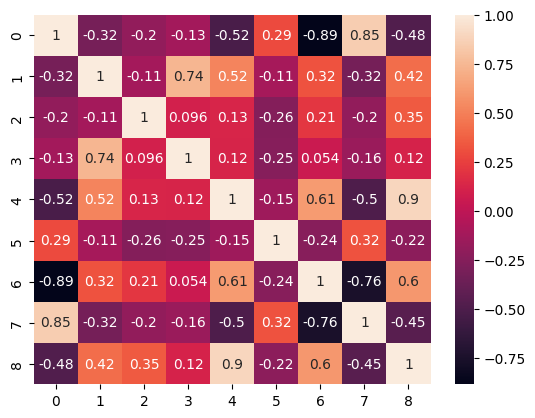

In [5]:
sns.heatmap(pd.DataFrame(data_scaled).corr(), annot=True)

pd.DataFrame(data_scaled).corr()[4][8].round(2)
#0.9

4. Теперь понизим размерность данных — возьмём для этого метод главных компонент `(PCA)` как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [6]:
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(data_scaled)
principalComponents.shape[1]
#5

5

Отлично! Можно отметить, что для того, чтобы объяснить бόльшую часть дисперсии, совершенно не требуется брать все признаки.

5. Используйте главные компоненты, выделенные в предыдущем задании.

Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.

In [7]:
pca.explained_variance_ratio_[0].round(2)
#0.46

0.46

6. Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают `0.001`, не считая единичных значений на главной диагонали?

In [8]:
pd.DataFrame(principalComponents.round(4)).corr()
#0

,0,1,2,3,4
0,1.000000e+00,-0.000002,9.120781e-07,-0.000002,0.000002
1,-1.547591e-06,1.000000,-2.356769e-06,-0.000002,-0.000002
2,9.120781e-07,-0.000002,1.000000e+00,-0.000002,0.000002
3,-1.974436e-06,-0.000002,-2.487242e-06,1.000000,-0.000001
4,2.225026e-06,-0.000002,2.334175e-06,-0.000001,1.000000


Как видим, даже самый большой коэффициент корреляции практически неотличим от нуля — это значит, что мы всё сделали правильно, и теперь у нас есть пять независимых признаков, объясняющих до 90 % дисперсии.

7. Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм `k-means++`. В качестве значения параметра `random_state` возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

<AxesSubplot: >

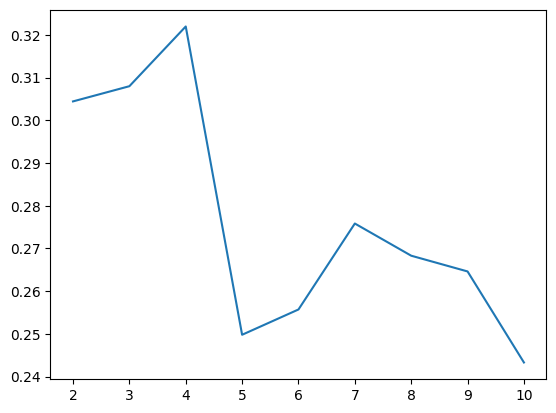

In [10]:
silhouette = {}
for clust_num in list(range(2,11)):
    silhouette[clust_num] = silhouette_score(principalComponents, KMeans(n_clusters=clust_num, random_state=1, init='k-means++').fit(principalComponents).labels_)
    
sns.lineplot(
    data=silhouette,
    x=silhouette.keys(),
    y=silhouette.values()
)
#4

8. Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм `k-means++` с этим параметром. В качестве значения `random_state` возьмите число 1.

В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='child_mort', ylabel='gdpp'>

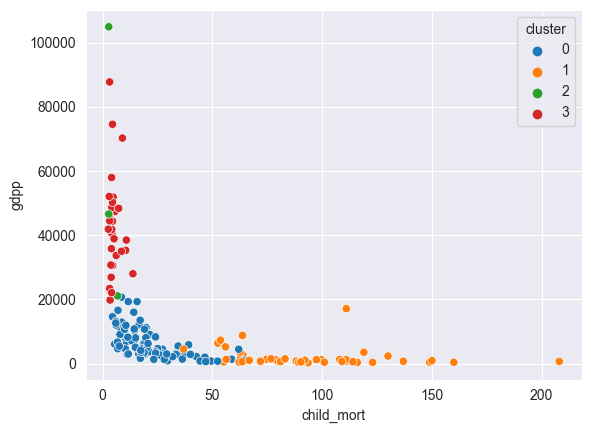

In [20]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(principalComponents)
data['cluster'] = kmeans.labels_
sns.set_style("darkgrid")
sns.scatterplot(
    data=data,
    x='child_mort',
    y='gdpp',
    hue='cluster',
    palette="tab10"
)
#1 кластер

9. Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи. Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая продолжительность жизни.

In [27]:
list(data[data['cluster']==1].sort_values(by='life_expec', ascending=True).iloc[0:3]['country'])
#Haiti', 'Lesotho', 'Central African Republic'

['Haiti', 'Lesotho', 'Central African Republic']